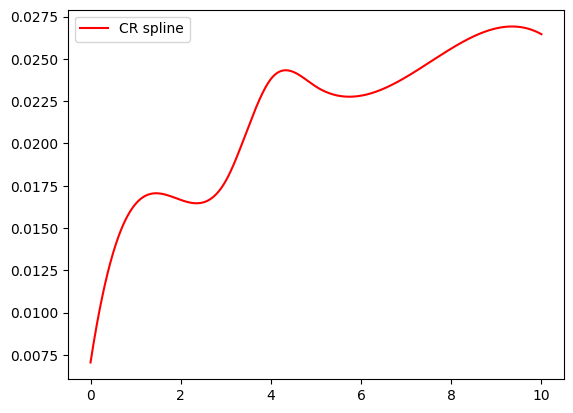

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import extended_cir
file_path = "data.xlsx"
cr_termS = pd.read_excel(file_path, sheet_name='credit_risk_term_structure')
ir_termS = pd.read_excel(file_path, sheet_name='interest_rate_term_structure')
cr_params = pd.read_excel(file_path, sheet_name='credit_risk_parameters')
ir_params = pd.read_excel(file_path, sheet_name='interest_rate_parameters')
ir_model = extended_cir.InterestRateCIRPP(ir_termS, ir_params['k'][0], ir_params['theta'][0], ir_params['sigma'][0], ir_params['x0'][0])
cr_model = extended_cir.CreditRiskCIRPP(ir_termS, cr_termS, cr_params['k'][0], cr_params['theta'][0],
                                        cr_params['sigma'][0], cr_params['x0'][0], cr_params['recovery_rate'][0], cr_params['premium_frequency'][0])
x_range = np.linspace(0, 10, 1000)
y_spline = cr_model.termStructureSpline(x_range)

plt.plot(x_range, y_spline, color='red', label='CR spline')
plt.legend()
plt.show()


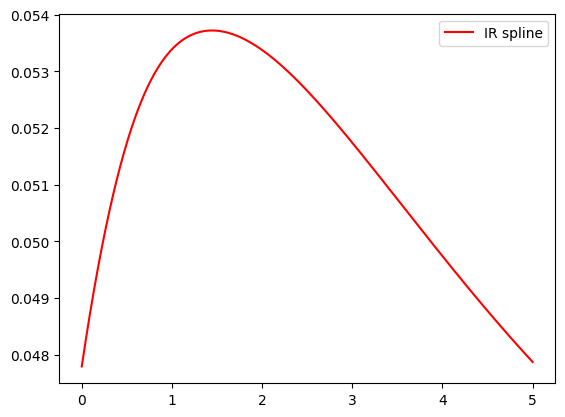

In [4]:
x_range = np.linspace(0, 5, 1000)
y_spline = ir_model.termStructureSpline(x_range)

plt.plot(x_range, y_spline, color='red', label='IR spline')
plt.legend()
plt.show()

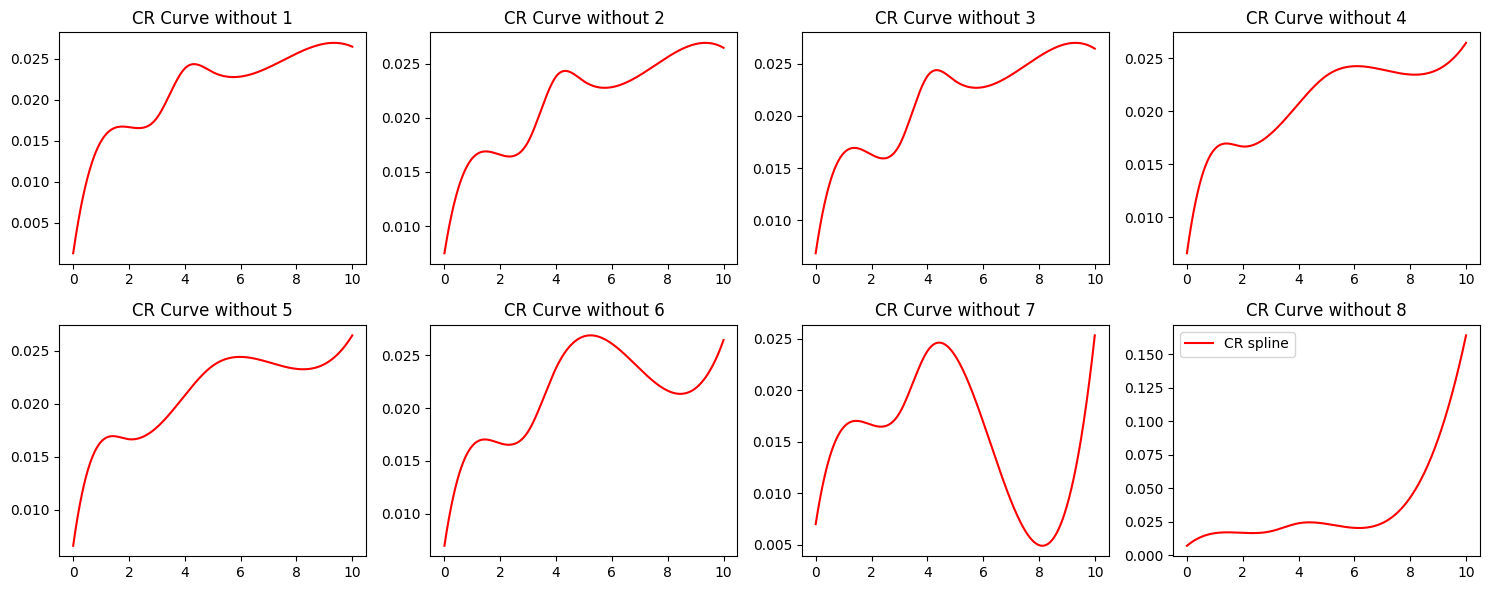

In [5]:
fig, axs = plt.subplots(2, 4, figsize=(15, 6))
print(cr_termS)
for i in range(len(cr_termS)):
    new_cr_termS = cr_termS.drop(i).reset_index(drop=True)
    cr_model = extended_cir.CreditRiskCIRPP(ir_termS, new_cr_termS, cr_params['k'][0], cr_params['theta'][0],
                                            cr_params['sigma'][0], cr_params['x0'][0], cr_params['recovery_rate'][0], cr_params['premium_frequency'][0])
    x_range = np.linspace(0, 10, 1000)
    y_spline = cr_model.termStructureSpline(x_range)
    axs.flatten()[i].set_title(f'CR Curve without {i}');
    axs.flatten()[i].plot(x_range, y_spline, color='red', label='CR spline')
plt.tight_layout()
plt.legend()
plt.show()

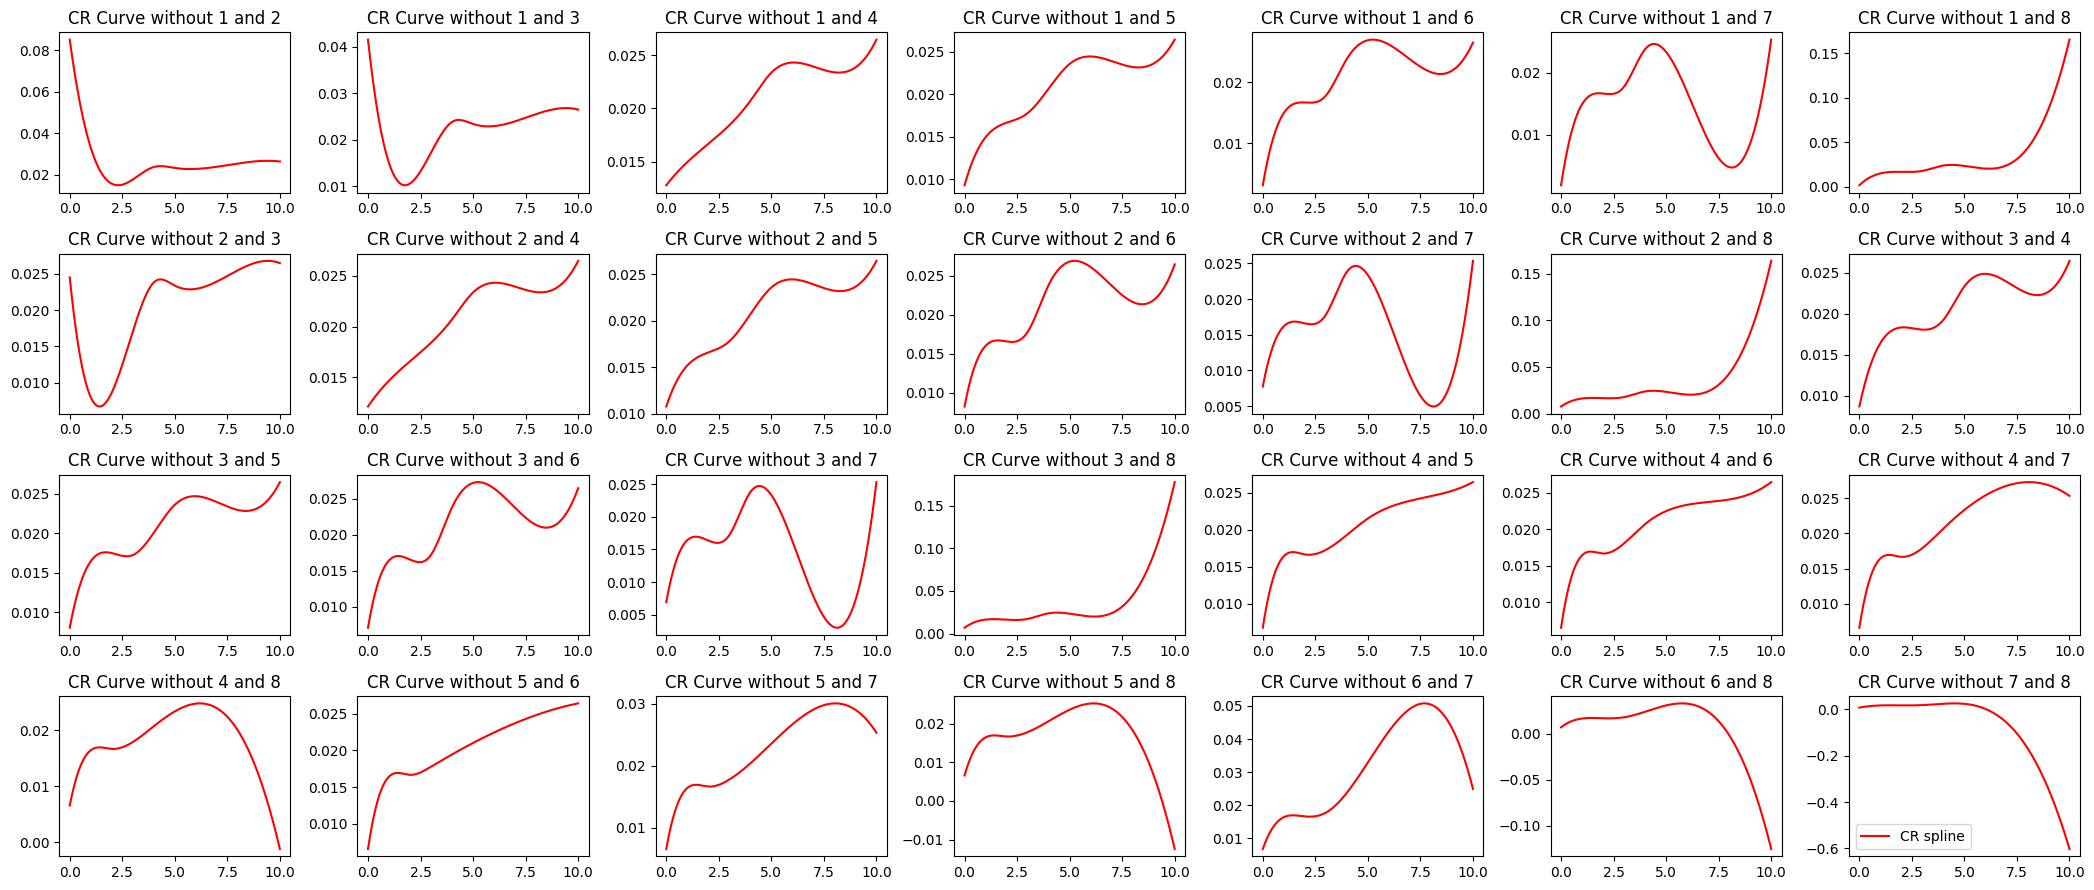

In [6]:
fig, axs = plt.subplots(4, 7, figsize=(21, 9))
k = 0
print(cr_termS)
for i in range(len(cr_termS)):
    j=i+1
    while j < len(cr_termS):
        new_cr_termS = cr_termS.drop([i, j]).reset_index(drop=True)
        cr_model = extended_cir.CreditRiskCIRPP(ir_termS, new_cr_termS, cr_params['k'][0], cr_params['theta'][0],
                                                cr_params['sigma'][0], cr_params['x0'][0], cr_params['recovery_rate'][0], cr_params['premium_frequency'][0])
        x_range = np.linspace(0, 10, 1000)
        y_spline = cr_model.termStructureSpline(x_range)
        axs.flatten()[k].set_title(f'CR Curve without {i} and {j}');
        axs.flatten()[k].plot(x_range, y_spline, color='red', label='CR spline')
        j+=1
        k+=1
plt.tight_layout()
plt.legend()
plt.show()